# Data Cleaning

In this data cleaning challenge, my approach was to remove outliers with a rolling function and then replaced them with a rolling mean. This strategy worked quite nicely.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("data/data_clean.csv")

df.head()

,Series 1
0,2397.167568
1,2371.333300
2,2573.025408
3,NaN
4,2574.872476


In [3]:
df.columns = ["Series_1"]
df_original = df.copy()

573


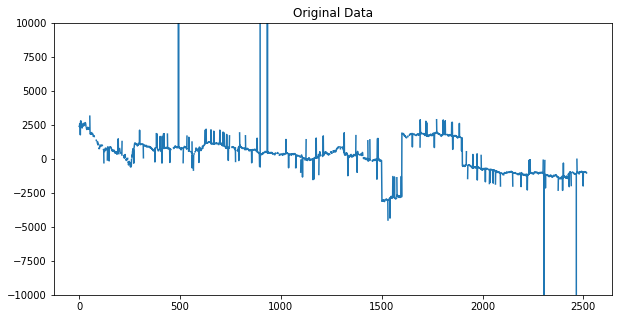

In [4]:
## Original Data
plt.figure(figsize=(10,5))

plt.plot(df["Series_1"])
plt.ylim(-10000, 10000)

plt.title("Original Data")

print(df["Series_1"].isnull().sum()) # printing number of nan values

In [5]:
# Fill nan values with rolling mean and eliminate most outliers

df = df.fillna(df.rolling(6,min_periods=1).mean())
for x in range(50):
    r = df.rolling(window=20)
    mps_up, mps_low = r.mean() + 3 * r.std(), r.mean()  -  3 * r.std()
    df.loc[~df['Series_1'].between(mps_low.Series_1, mps_up.Series_1), 'Series_1'] = np.NaN
    df['Series_1'] = df['Series_1'].fillna(method='bfill')

Text(0.5, 1.0, 'Data')

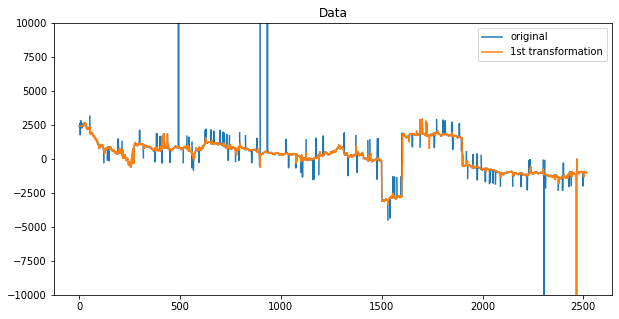

In [6]:
plt.figure(figsize=(10,5))

plt.plot(df_original["Series_1"], label="original")
plt.plot(df["Series_1"], label="1st transformation")

plt.ylim(-10000, 10000)
plt.legend()
plt.title("Data")


In [7]:
# Copying first 50 rows from original dataframe to working dataframe 
df["Series_1"].iloc[:50] = df_original["Series_1"].iloc[:50]
df = df.fillna(df.rolling(6,min_periods=1).mean())

Text(0.5, 1.0, 'Data')

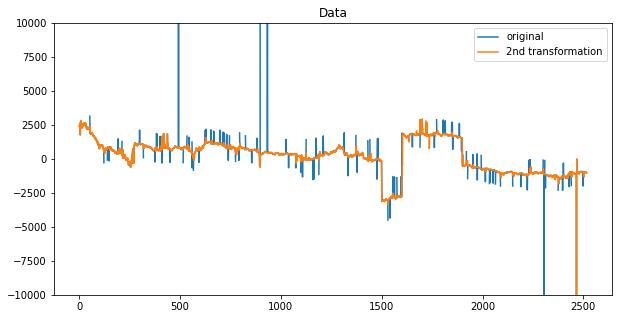

In [8]:
plt.figure(figsize=(10,5))

plt.plot(df_original["Series_1"], label="original")
plt.plot(df["Series_1"], label="2nd transformation")

plt.ylim(-10000, 10000)
plt.legend()
plt.title("Data")

In [9]:
# Eliminating obvious outlier at the end of the series and filling it out
df[df<-5000] = 0
df = df.fillna(df.rolling(6,min_periods=5).mean())

Text(0.5, 1.0, 'Data: Final')

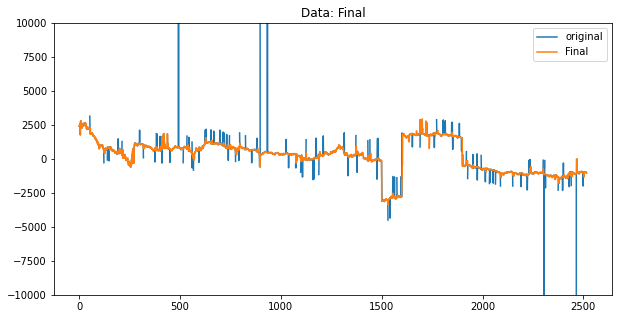

In [10]:
plt.figure(figsize=(10,5))

plt.ylim(-10000, 10000)
# plt.xlim(1604, 2000)

plt.plot(df_original["Series_1"], label="original")
plt.plot(df["Series_1"], label="Final")

plt.ylim(-10000, 10000)
plt.legend()
plt.title("Data: Final")


In [11]:
## csv file to submit
# df.to_csv("SAR_data_cleaning.csv", index=False)